#1. La récupération des données

In [1]:
import pandas as pd

car_data = pd.read_csv("carData.csv") #affectation de BDD à la variable car_data
print(type(car_data), '\n') #la variable car_data est bien un DataFrame

<class 'pandas.core.frame.DataFrame'> 



#2. Exploration des données

In [2]:
size = car_data.shape #affiche le nombre de colonnes et de lignes
print('la taille de la BDD est:\n', size, '\n')

car_data_head = car_data.head(5) #affiche les 5 premieres lignes 
print('Voici les 5 premières lignes de la BDD:\n', car_data_head, '\n')

car_data_tail = car_data.tail(5) #affiche les 5 dernieres lignes
print('Voici les 5 dernières lignes de la BDD:\n', car_data_tail, '\n')

la taille de la BDD est:
 (301, 9) 

Voici les 5 premières lignes de la BDD:
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0   

Voici les 5 dernières lignes de la BDD:
     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     

In [ ]:
#Calcul des statistiques de base:

In [3]:
df = pd.DataFrame(car_data)
print(df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [ ]:
#traçage de la distribution avec matpotlib

Text(0.5, 1.0, 'La distribution du prix des voitures en fonction de son année de sortie')

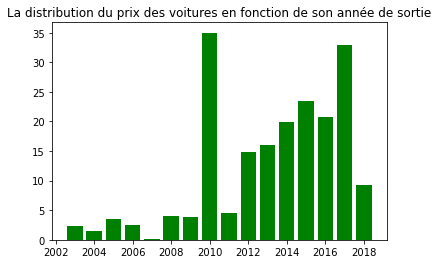

In [4]:
import matplotlib.pyplot as plt
x = car_data.Year
y = car_data.Selling_Price
plt.bar(x,y, align="center", facecolor="green")
plt.title('La distribution du prix des voitures en fonction de son année de sortie')

La bibliothèque matpotlib nous a permis de shématiser l'évolution du prix des voitures en fonction de l'année de sortie. on voit clairement que les voitures sorties en 2010 récoltent le prix de vente le plus chèr, suivis par celle sorties en 2017. Quelles sont les raisons derrière ce phénomène? il sera intéressent d'étudier le nombre et les propriètés des voitures sorties en 2010 et 2017. 

#3. Chargement de la BDD dans un fichier MySQL

In [5]:
import pymysql 
from sqlalchemy import create_engine 
engine = create_engine('mysql+pymysql://root:@localhost/car_Data')
car_data.to_sql('buycar', con=engine, if_exists='append')
car_data2 = pd.read_sql_table('buycar', con=engine)
print(car_data2)

      index Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
0         0     ritz  2014           3.35           5.59       27000   
1         1      sx4  2013           4.75           9.54       43000   
2         2     ciaz  2017           7.25           9.85        6900   
3         3  wagon r  2011           2.85           4.15        5200   
4         4    swift  2014           4.60           6.87       42450   
...     ...      ...   ...            ...            ...         ...   
4811    296     city  2016           9.50          11.60       33988   
4812    297     brio  2015           4.00           5.90       60000   
4813    298     city  2009           3.35          11.00       87934   
4814    299     city  2017          11.50          12.50        9000   
4815    300     brio  2016           5.30           5.90        5464   

     Fuel_Type Seller_Type Transmission  Owner  
0       Petrol      Dealer       Manual      0  
1       Diesel      Dealer       Manu

#affichage des informations de base de la nouvelle BDD

In [6]:
car_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4816 non-null   int64  
 1   Car_Name       4816 non-null   object 
 2   Year           4816 non-null   int64  
 3   Selling_Price  4816 non-null   float64
 4   Present_Price  4816 non-null   float64
 5   Kms_Driven     4816 non-null   int64  
 6   Fuel_Type      4816 non-null   object 
 7   Seller_Type    4816 non-null   object 
 8   Transmission   4816 non-null   object 
 9   Owner          4816 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 376.4+ KB


En affichant la nouvelle BDD car_data2, on retrouve les différentes colonnes avec les même attributs que la BDD initiale. Ceci est également vrai pour les différents types des attributs. 

##4. Traçage des données avec Seaborn

Text(0.5, 1.0, 'fig2=l évolution du prix de vente en fonction de l année de sortie des voitures')

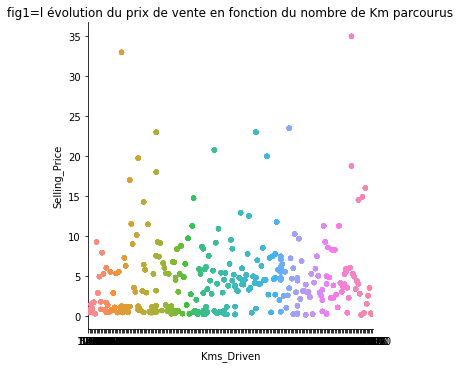

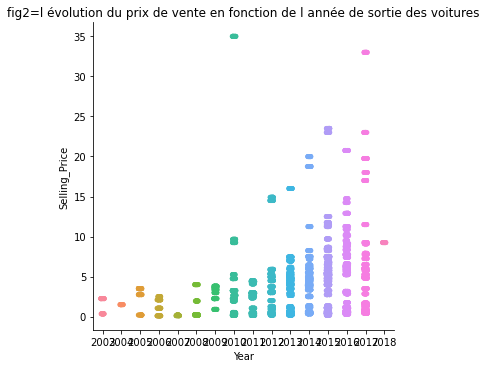

In [8]:
import seaborn as sns
sns.catplot(x='Kms_Driven', y='Selling_Price', data=car_data2)
plt.title('fig1=l évolution du prix de vente en fonction du nombre de Km parcourus')
sns.catplot(x='Year', y='Selling_Price', data=car_data2)
plt.title('fig2=l évolution du prix de vente en fonction de l année de sortie des voitures')

fig1: sur cet illustration, on voit que le nuage de points representant le lien entre le prix de vente et le nombre de Km parcourus est assez dispercé. A premier vue, le corrélation entre ces 2 paramètres n'est pas linéaire. 
fig2: cette representation montre un nuage de points plutôt régulier et en cohérence avec la figure obtenue via matpotlib, avec en plus quelques valeurs dispérsées. 

#5 Régression linéaire avec numpy

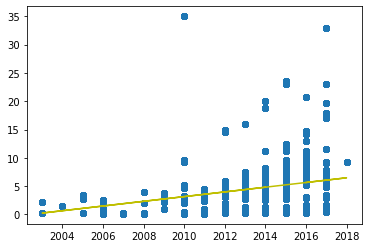

In [9]:
import numpy as np

x = car_data2['Year']
y = car_data2['Selling_Price']

a = np.polyfit(x,y,1) 
b = np.poly1d(a)

plt.scatter(x,y)
plt.plot(x,b(x),"y")

#Regression linéaire avec Scipy

In [15]:
import scipy
from scipy.stats import linregress

x = car_data2['Year']
y = car_data2['Selling_Price']

lr = scipy.stats.linregress(x,y)
print(lr)

LinregressResult(slope=0.4150916946355385, intercept=-831.1789245913261, rvalue=0.23614098016042706, pvalue=5.0870386458765075e-62, stderr=0.024618423994448357)


#Regression Lineaire avec SKlearn

In [ ]:
from sklearn import linear_model

X = car_data2[['Year']]
Y = car_data2['Selling_Price']

model = linear_model.LinearRegression()
results = model.fit(X, Y)
print(results.coef_)
print(results.intercept_)

def sklfunc(k):
 return results.coef_ * k + results.intercept_
sns.scatterplot(x,y) 
plt.plot(x,sklfunc(x),'red')

#Classe/formule de regression linéaire

In [ ]:
x = car_data2['Year']
y = car_data2['Selling_Price']

class LineReg:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def func(self):
        
        xmean = self.x.mean()
        ymean = self.y.mean()
        
        xvariance = sum([(j-xmean)**2 for j in self.x])

        xycovariance = 0
        for i in range(len(x)):
            xycovariance +=(self.x[i]-xmean)*(self.y[i]-xmean)
            
        a = xycovariance / xvariance
        b = ymean - a * xmean
        return(a,b)
lr = LineReg(x,y)
a, b = lr.func()
print('a =', a, 'b=', b)

x1= input('Merci de renseigner l année')
x1= float(x1)
y1= x1 * a + b 
def predict(x1):
    x1= input('Merci de renseigner l année')
    y1= x1 * a + b 
    return (y1)
print('le prix de vente d une voiture de', x1, 'est de', y1)